In [1]:
#imports
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib .pyplot as plt
import math
import random

In [2]:
#importing the data
df = pd.read_csv('Dataset.csv', names=['x','y'])

In [3]:
#organising the data
data = np.array([df['x'],df['y']])
mean_x = np.sum(data[0])/1000
mean_y = np.sum(data[1])/1000

for i in range(0,1000):
        data[0][i] -= mean_x
        data[1][i] -= mean_y

In [4]:
def finddist(p,q):
    total = 0
    for i in range(0, len(p)):
        total += (p[i]-q[i])**2
    return total

In [5]:
def get_random_init(clusters):
    #creating clusters
    cluster_assignment = np.empty([1000])

    #Random initialization:
    temp_set = set()
    while(len(temp_set) != clusters):
        for i in range(0,1000):
            cluster_assignment[i] = random.randint(0,clusters-1)
            temp_set.add(cluster_assignment[i])
    return cluster_assignment


In [6]:
def k_cluster(clusters, kernel_map, cluster_assignment, data):
        
    #error
    total_error = -1
    condition = 1
    error_list = []

    while(condition == 1):
        
        #calculate mean for every cluster

        cluster_mean = np.zeros([clusters, len(data[:,0])])
        cluster_count = np.zeros([clusters])

        for i in range(0,1000):
            cluster = int(cluster_assignment[i])
            point = data[:,i]
            cluster_mean[cluster] = np.add(cluster_mean[cluster], point)
            cluster_count[cluster] += 1

        for i in range(0,clusters):
            number_of_points = float(cluster_count[i])
            if(number_of_points == 0):
                number_of_points = 1
            cluster_mean[i] = np.divide(cluster_mean[i], number_of_points)



        cluster_new_assignment = np.zeros([1000])

        #calculate error for every point and its corresponding cluster assignment
        error = 0
        for i in range(0,1000):
            my_cluster = int(cluster_assignment[i])
            my_cluster_mean = cluster_mean[my_cluster]
            error += finddist(data[:,i], my_cluster_mean) 

        
        

        if(total_error == -1):
            total_error = error
        elif(error < total_error):
            total_error = error
        else:
            break
            
        #print(error)
        error_list.append(error)
        
        for i in range(0,1000):
            temp = -1
            temp_index = -1
            for j in range(0, clusters):
                dist = finddist(data[:,i].transpose(), cluster_mean[j])
                if(temp == -1):
                        temp = dist
                        temp_index = j

                elif(dist < temp):
                       temp = dist
                       temp_index = j

            cluster_new_assignment[i] = temp_index

        dummy = 0
        for i in range(0,1000):
            if(cluster_assignment[i] != cluster_new_assignment[i]):
                dummy += 1
            cluster_assignment[i] = cluster_new_assignment[i]
        #print(dummy , " points jumped")

    color = ['red','blue','y','g','orange','black']
    axes = np.linspace(-10.0, 8.0, num=100, retstep=True)
    plt.title("plotting vornoi regions")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    for y in range(-10,10):
        for x in range(len(axes[0])):
            temp = -1
            temp_index = -1
            for j in range(0, clusters):
                dist = finddist(np.array([axes[0][x],y]), cluster_mean[j])
                if(temp == -1):
                        temp = dist
                        temp_index = j

                elif(dist < temp):
                       temp = dist
                       temp_index = j
            plt.scatter(axes[0][x],y, c = color[temp_index])

    for i in range(0, clusters):
        plt.scatter(cluster_mean[i][0], cluster_mean[i][1], c = 'black')

    plt.show()
    plt.title("plotting data points coloured by clusters")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")

    for i in range(0,1000):
        color = ['red','blue','y','g','orange','black']
        for j in range(0, clusters):
            if(cluster_assignment[i] == j):
                plt.scatter(data[0][i], data[1][i],c=color[j])  

    plt.show()
    
    plt.title("plotting errors obtained")
    plt.xlabel("x-axis: iteration")
    plt.ylabel("y-axis: error")
    plt.plot(error_list)
    plt.show()

Question 2: part (i)

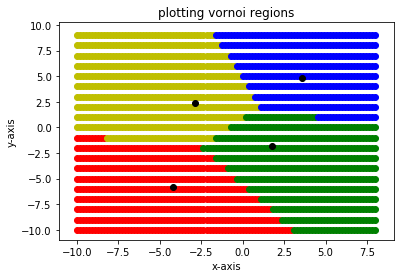

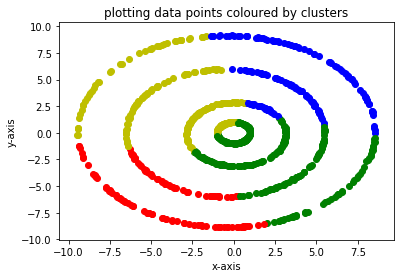

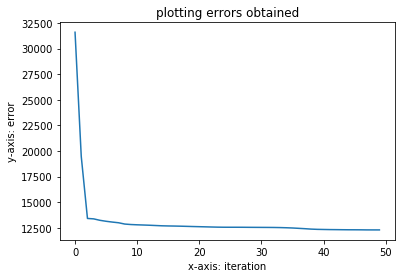

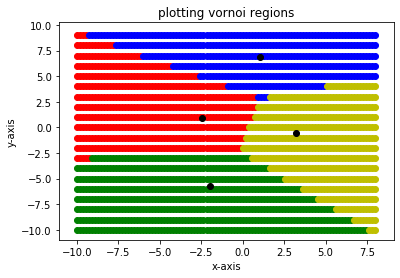

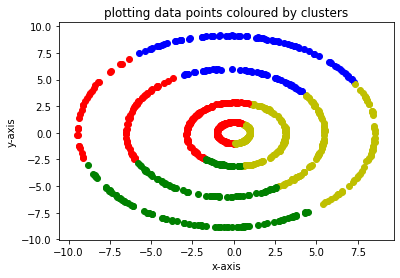

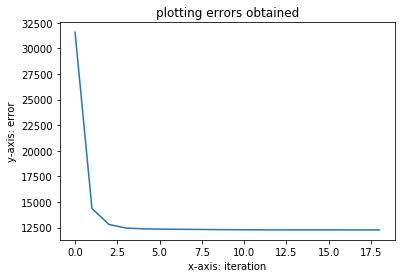

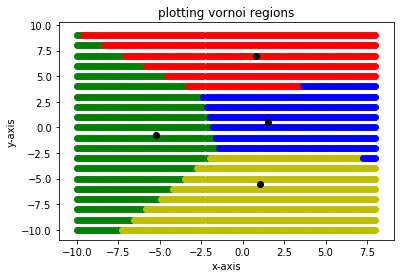

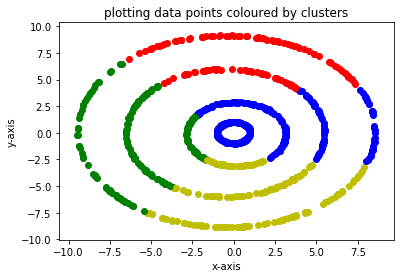

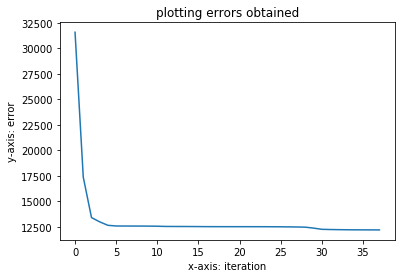

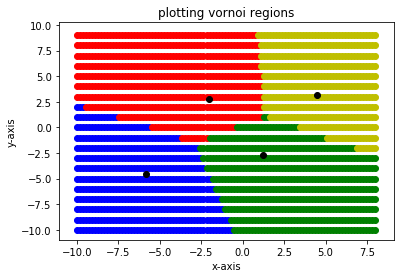

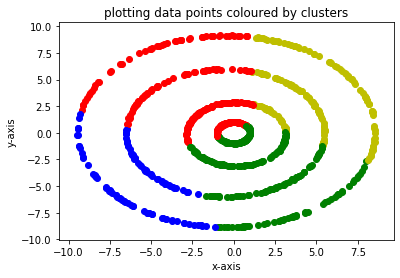

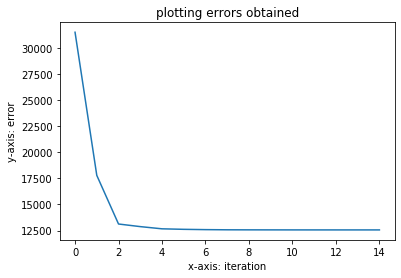

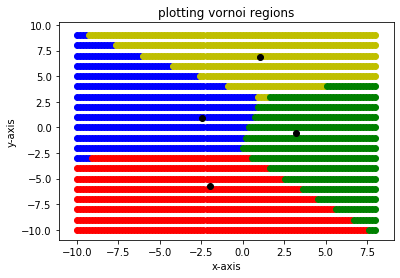

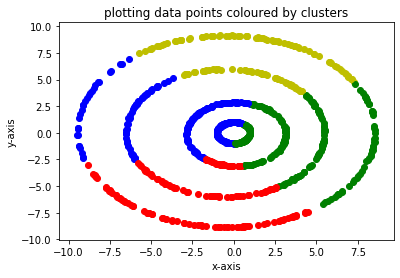

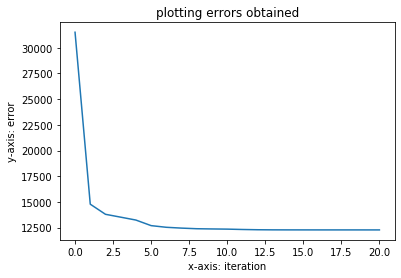

In [7]:
for i in range(0,5):
    clusters = 4;
    cluster_assignment = get_random_init(clusters)
    k_cluster(clusters, data, cluster_assignment, data)

Question 2: Part (ii)

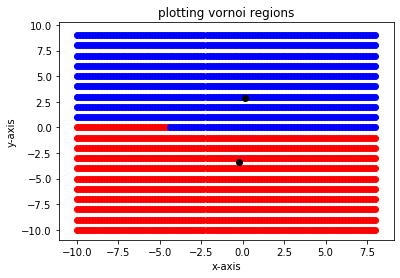

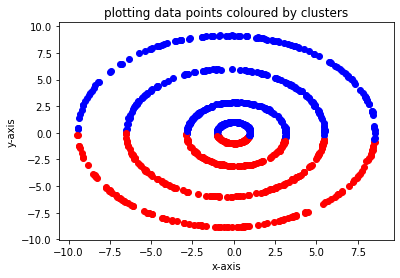

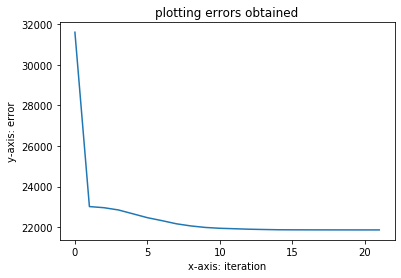

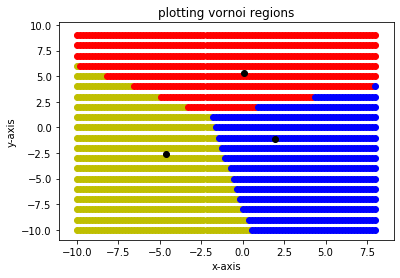

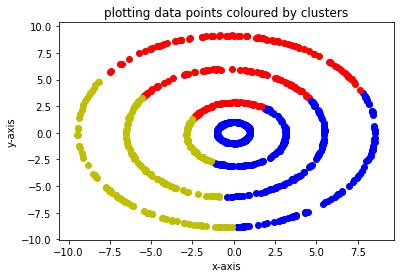

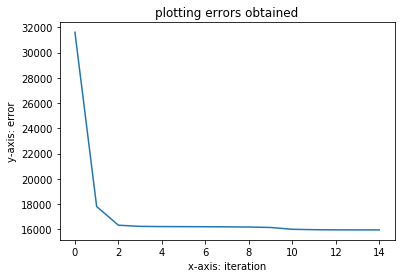

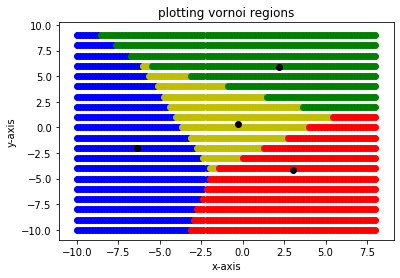

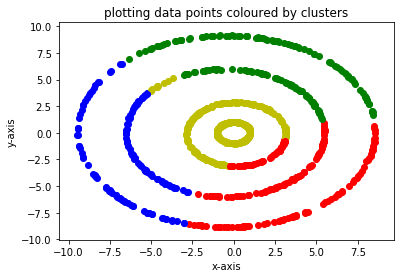

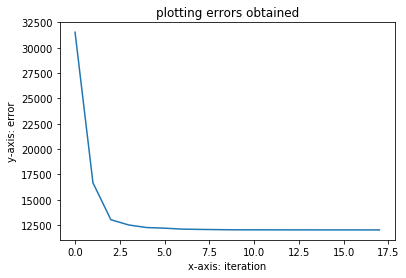

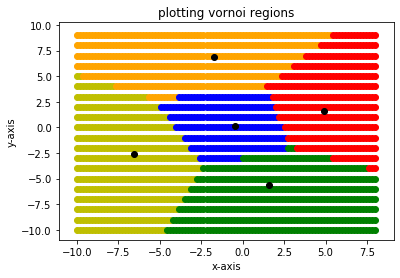

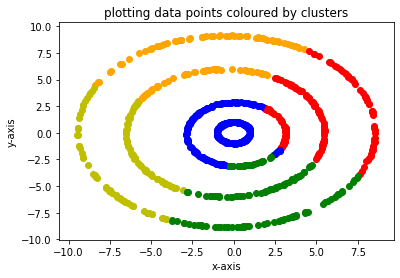

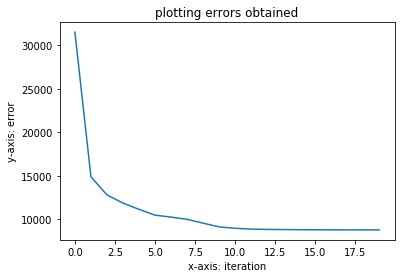

In [9]:
for clusters in range(2,6):
    #fixing a cluster assignment
    cluster_assignment = get_random_init(clusters)
    k_cluster(clusters, data,cluster_assignment, data)

Question 2: Part (iii)

In [10]:
def findNorm(p):
    total = 0;
    for i in range(0, len(p)):
        total += (p[i])**2
    return total

In [17]:
def k_cluster_kernelized(clusters, top_eigen_vetors):
    
    #random cluster assignment
    cluster_assignment = np.empty([1000])
    
    temp_set = set()
    while(len(temp_set) != clusters):
        for i in range(0,1000):
            cluster_assignment[i] = random.randint(0,clusters-1)
            temp_set.add(cluster_assignment[i])


    #error
    total_error = -1
    condition = 1
    error_list = []
    
    while(condition == 1):
        cluster_mean = np.zeros([clusters, clusters])
        cluster_count = np.zeros([clusters])

        for i in range(0,1000):
            cluster = int(cluster_assignment[i])
            point = top_eigen_vetors[i];
            cluster_mean[cluster] = np.add(cluster_mean[cluster], point)
            cluster_count[cluster] += 1

        for i in range(0,clusters):
            cluster_mean[i] = np.divide(cluster_mean[i], cluster_count)



        cluster_new_assignment = np.zeros([1000])

        error = 0
        for i in range(0,1000):
            my_cluster = int(cluster_assignment[i])
            my_cluster_mean = cluster_mean[my_cluster]
            error += finddist(top_eigen_vetors[i], my_cluster_mean) 

        

        if(total_error == -1):
            total_error = error
        elif(error < total_error):
            total_error = error
        else:
            break

        #print(error)
        error_list.append(error)
        
        
        for i in range(0,1000):
            temp = -1
            temp_index = -1
            for j in range(0, clusters):
                dist = finddist(top_eigen_vetors[i], cluster_mean[j])
                if(temp == -1):
                        temp = dist
                        temp_index = j

                elif(dist < temp):
                       temp = dist
                       temp_index = j

            cluster_new_assignment[i] = temp_index

        dummy = 0
        for i in range(0,1000):
            if(cluster_assignment[i] != cluster_new_assignment[i]):
                dummy += 1
            cluster_assignment[i] = cluster_new_assignment[i]
            
    cluster_mean = np.zeros([clusters, 2])
    cluster_count = np.zeros([clusters])
    for i in range(0,1000):
        cluster = int(cluster_assignment[i])
        cluster_mean[cluster] = np.add(cluster_mean[cluster] , data[:,i])
        cluster_count[cluster] += 1
    for i in range(0, clusters):
        cluster_mean[i] = np.divide(cluster_mean[i], cluster_count[i])
        
    color = ['red','blue','y','g','orange','black']
    axes = np.linspace(-10.0, 8.0, num=100, retstep=True)
    plt.title("plotting vornoi regions")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    for y in range(-10,10):
        for x in range(len(axes[0])):
            temp = -1
            temp_index = -1
            for j in range(0, clusters):
                dist = finddist(np.array([axes[0][x],y]), cluster_mean[j])
                if(temp == -1):
                        temp = dist
                        temp_index = j

                elif(dist < temp):
                       temp = dist
                       temp_index = j
            plt.scatter(axes[0][x],y, c = color[temp_index])

    for i in range(0, clusters):
        plt.scatter(cluster_mean[i][0], cluster_mean[i][1], c = 'black')

    plt.show()


    plt.title("plotting data points coloured by clusters")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    
    for i in range(0,1000):
        color = ['red','blue','y','g','orange']
        for j in range(0, clusters):
            if(cluster_assignment[i] == j):
                plt.scatter(data[0][i], data[1][i],c=color[j])  

    plt.show()
    plt.title("plotting errors obtained")
    plt.xlabel("x-axis: iteration")
    plt.ylabel("y-axis: error")
    plt.plot(error_list)
    plt.show()
    print(error_list)
    #compute total error 
    error = 0
    for i in range(0,1000):
        my_cluster = int(cluster_assignment[i])
        my_cluster_mean = cluster_mean[my_cluster]
        error += finddist(data[:,i], my_cluster_mean) 
    print(error)

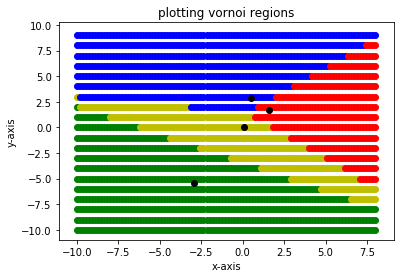

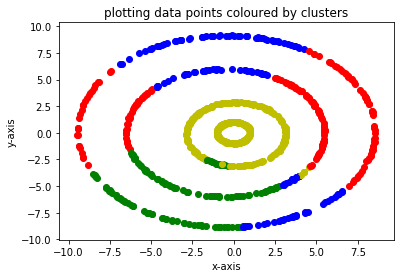

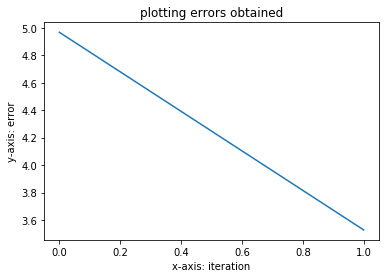

[4.967615366883146, 3.5278437986779045]
23255.290193010384


In [18]:
# kernelizing the data
Kernel = np.matmul(data.transpose(), data)
for i in range(0,1000):
    for j in range(0,1000):
        Kernel[i][j] = (Kernel[i][j] + 1)**2
#centering the Kernel
one_n = np.zeros([1000,1000])
for i in range(0,1000):
    for j in range(0,1000):
        one_n[i][j] = (1/1000); 
    
identity = np.identity(1000)

i_one_n = np.subtract(identity, one_n)
Kcentered = np.matmul(i_one_n, Kernel)
Kcentered = np.matmul(Kcentered, i_one_n)


#eigen-decompose Kcentered
eigen_values, eigen_vectors = eig(Kcentered)
eigen_values = np.real(eigen_values)
eigen_vectors = np.real(eigen_vectors.transpose())

#extract top K eigen vectors
clusters = 4
top_eigen_vetors = np.zeros([clusters, 1000])

for i in range(0,clusters):
    index = np.argmax(eigen_values)
    top_eigen_vetors[i] = eigen_vectors[index]
    eigen_values = np.delete(eigen_values, index, axis=0)
    eigen_vectors = np.delete(eigen_vectors, index, axis = 0)
    
#normalise top_eigen_vetors matrix
for i in range(0, 1000):
    point = top_eigen_vetors[:,i];
    norm = findNorm(point)
    norm = math.sqrt(norm)
    point = np.divide(point, norm)
    top_eigen_vetors[:,0] = point


k_cluster_kernelized(clusters, top_eigen_vetors.transpose())

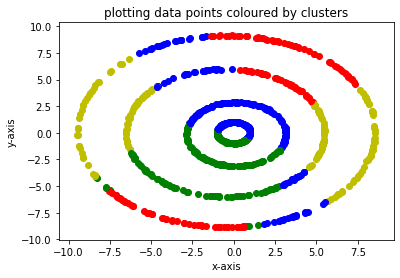

28785.360966743778


In [19]:
cluster_asignment = np.zeros([1000])

for i in range(0,1000):
    cluster_asignment[i] = np.argmax(top_eigen_vetors[:,i])

plt.title("plotting data points coloured by clusters")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

color = ['red','blue','y','g']
for i in range(0,1000):
    col = int(cluster_asignment[i])
    plt.scatter(data[0][i], data[1][i],c=color[col])

plt.show()

cluster_mean = np.zeros([clusters, 2])
cluster_count = np.zeros([clusters])
for i in range(0,1000):
    cluster = int(cluster_asignment[i])
    cluster_mean[cluster] = np.add(cluster_mean[cluster] , data[:,i])
    cluster_count[cluster] += 1
for i in range(0, clusters):
    cluster_mean[i] = np.divide(cluster_mean[i], cluster_count[i])


#compute total error 
error = 0
for i in range(0,1000):
    my_cluster = int(cluster_asignment[i])
    my_cluster_mean = cluster_mean[my_cluster]
    error += finddist(data[:,i], my_cluster_mean) 
print(error)